# Support Vector Regression (SVR)

## Introduction

Support Vector Regression (SVR) is a type of regression analysis that uses the principles of **Support Vector Machines (SVM)*** to perform predictions.

### 1. **Introduction to Support Vector Regression**
SVR was developed by Vladimir Vapnik and colleagues in the 1990s, initially at Bell Labs. The key concept is the **epsilon-insensitive tube**, which introduces a margin within which errors are not penalized, giving the model some flexibility.

### 2. **Comparison with Linear Regression**
In linear regression, the goal is to find a line that minimizes the error between actual and predicted values using the **ordinary least squares (OLS)** method. This method minimizes the squared differences between the actual data points and the regression line.

SVR, on the other hand, introduces a "tube" around the regression line. The distance from this tube is what's considered for errors, and points outside of this tube are treated differently than those within it.

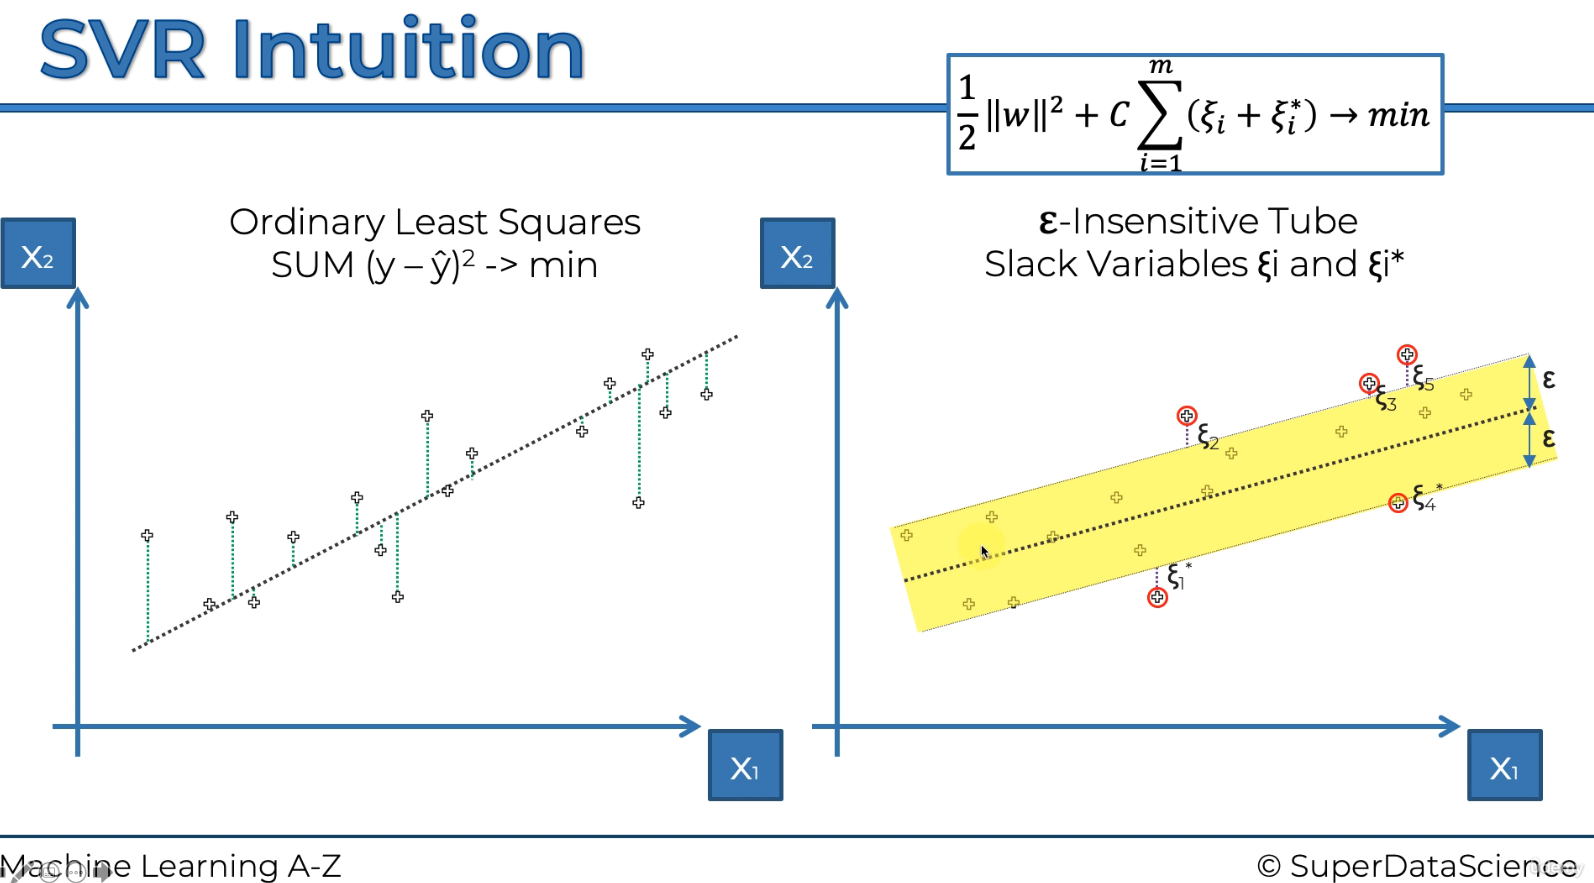

### 3. **The Epsilon-Insensitive Tube**
The tube in SVR has a width determined by a parameter called **epsilon**. Any data points that fall within this tube are ignored when calculating the error. This gives the model tolerance for small deviations, reducing sensitivity to minor errors. The points that lie outside the tube, however, are treated more carefully, and the error for these points is computed as the distance from the edge of the tube, rather than the central regression line.

### 4. **Slack Variables**
Data points outside the epsilon-insensitive tube introduce slack, measured by variables called **slack variables (ξ and ξ\*)**. These variables represent the distances of the points from the tube, whether they are above or below it. The goal in SVR is to minimize these distances, while still allowing for some flexibility within the tube.

### 5. **Support Vectors**
The data points outside the epsilon-insensitive tube are the **support vectors**. These points determine the shape and orientation of the regression line and tube. Unlike in linear regression where all points influence the line, in SVR only these support vectors impact the final model, giving it its name.

### 6. **Why Use SVR?**
SVR is particularly useful when some error tolerance is acceptable, and when the model needs to focus more on capturing the broader trend rather than being too sensitive to every small error. It strikes a balance between bias and variance by allowing some flexibility with errors inside the tube but focusing on larger deviations outside.

### Key Takeaways:
- SVR uses an **epsilon-insensitive tube** to allow for small errors within a margin.
- Points outside the tube are penalized, with errors measured as the distance from the tube’s boundary.
- **Support vectors** are the points that lie outside the tube and define the regression model.
- SVR offers a more robust approach when some error tolerance is desirable.

This balance of flexibility and precision makes SVR a powerful tool for handling regression problems in a wide range of applications.

### Heads Up:
The previous text covered **linear SVR**, but the upcoming tutorials will introduce **non-linear SVR** using the **Radial Basis Function (RBF) kernel**.

Non-linear SVR involves more complex calculations, often requiring mapping data into higher dimensions using a **kernel trick**. The intuition behind non-linear SVR will be covered later in the course, along with topics such as **Kernel SVM**, **mapping to higher dimensions**, and different types of kernel functions.

The instructor recommends following the practical Python tutorials first, keeping in mind that a non-linear kernel is being used, with the theoretical explanation coming later.

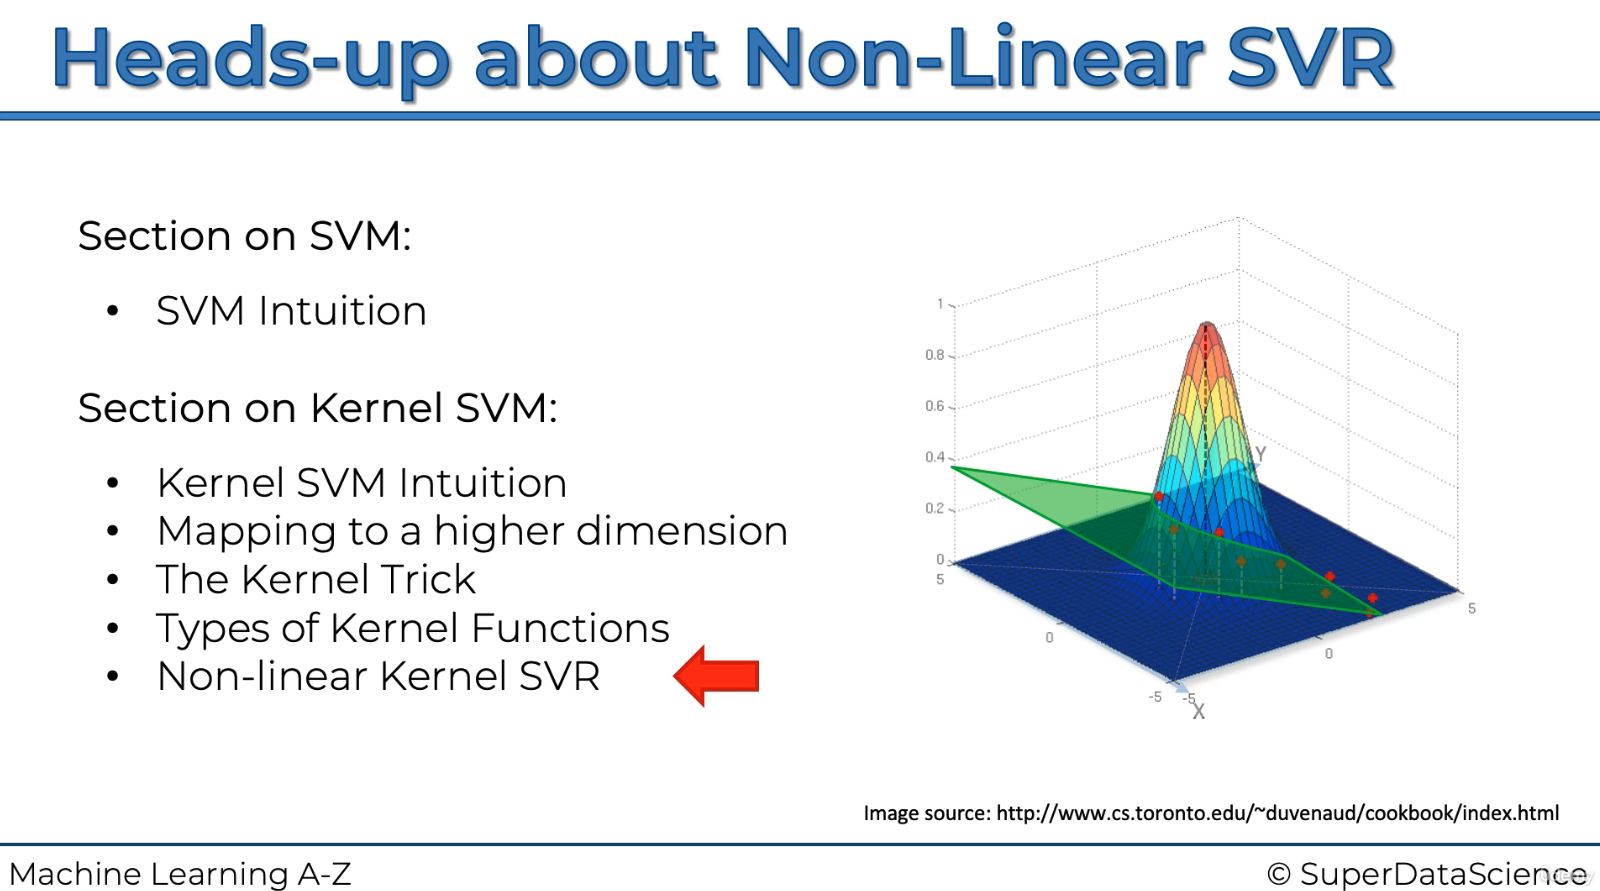

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 2 - Regression/4 Support Vector Regression (SVR)/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # matrix of features
y = dataset.iloc[:, -1].values # dependent variable vector

The data is the same as the one used in the Polynomial Regression section:

1. **Data Set Description**:
   - The data set, "Position_Salaries," contains the salaries for various job positions ranging from Business Analyst to CEO.
   - The task is to predict the salary for a candidate who previously held a "Region Manager" position, which is in between positions 6 (Business Analyst) and 7 (CEO).

2. **Problem Statement**:
   - The candidate is asking for a salary of \$160,000, claiming it is what they earned in their last company.
   - The goal is to determine if this claimed salary is accurate using SVR.

In [11]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [12]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [13]:
# Reshapes the target variable 'y' into a column vector with one column and 'len(y)' rows
y = y.reshape(len(y),1)

In [14]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

**Why feature scaling is necessary for Support Vector Regression (SVR):**

Unlike linear regression models, SVR does not have an explicit equation with coefficients multiplying the features. These coefficients in linear models help adjust for large feature values, so feature scaling isn't required for models like Simple Linear Regression, Multiple Linear Regression, and Polynomial Regression.

However, in SVR, where the relationship between the dependent variable and the features is implicit, there are no such compensating coefficients, making feature scaling essential to ensure proper model performance. This applies to other models with implicit relationships as well.

**Notes about Feature Scaling in this exercise:**

- Since the dataset is not split (to leverage all data), feature scaling will be applied to the entire feature matrix `X` (we do not have a separation between training set and test set).

- Feature scaling must also be applied to the dependent variable `y` (salary), which ranges from 45,000 to 1 million.
  - For SVR, if scaling is not applied to both features and the dependent variable, the model may underperform.
  - This is due to the implicit equation nature of SVR, where large differences in scale between features and the dependent variable could lead to some variables being neglected by the model.

- Feature scaling is not needed for binary variables (e.g., 0 or 1) but is essential when there's a large disparity in the range of values between features and the target variable. We will usually apply it for all those variables that fall outside the range [-3, 3].

- Note the importance of **inverse transformation** after scaling, to interpret results in their original scale for final predictions and visualization.

In [15]:
# Import the StandardScaler class for feature scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler for the features (X)
sc_X = StandardScaler()

# Create another instance of StandardScaler for the target variable (y)
sc_y = StandardScaler()

# Fit the scaler to X and transform the features by scaling them
X = sc_X.fit_transform(X)

# Fit the scaler to y and transform the target variable by scaling it
y = sc_y.fit_transform(y)

In [16]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [17]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

As we did before in Polynomial Regression, this time we won't split the whole data set into a training set and a test set either, because we want to leverage the maximum data to learn these correlations between those position levels and the salaries.

Gaussian Radial Basis Function (RBF) Kernel:

[More info](https://data-flair.training/blogs/svm-kernel-functions/)

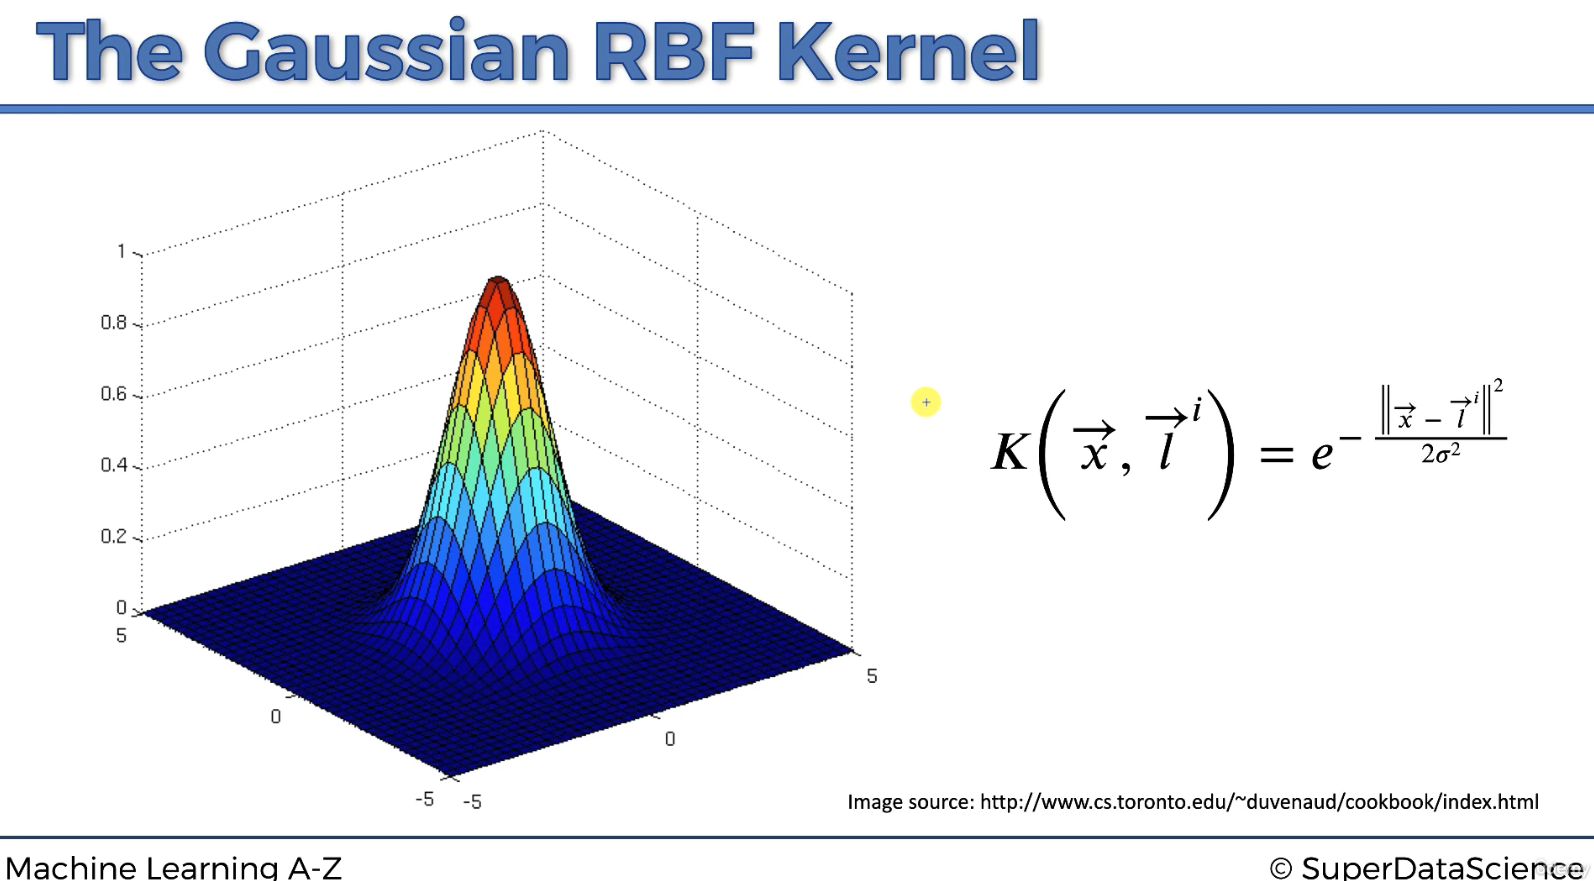

In [19]:
# Import the Support Vector Regression (SVR) model from sklearn
from sklearn.svm import SVR

# Create an SVR regressor object with an 'rbf' (Radial Basis Function) kernel
regressor = SVR(kernel = 'rbf')

# Fit the SVR model to the scaled feature matrix X and target variable y
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [20]:
sc_y.inverse_transform(  # Apply inverse transformation to convert the predicted scaled value back to the original scale of y
    regressor.predict(  # Predict the scaled salary value for the feature 6.5 using the trained SVR model
        sc_X.transform([[6.5]])  # Scale the input feature 6.5 using the previously fitted scaler for X
    ).reshape(-1, 1)  # Reshape the predicted result to a 2D array (required by inverse_transform)
)

array([[170370.0204065]])

## Visualising the SVR results

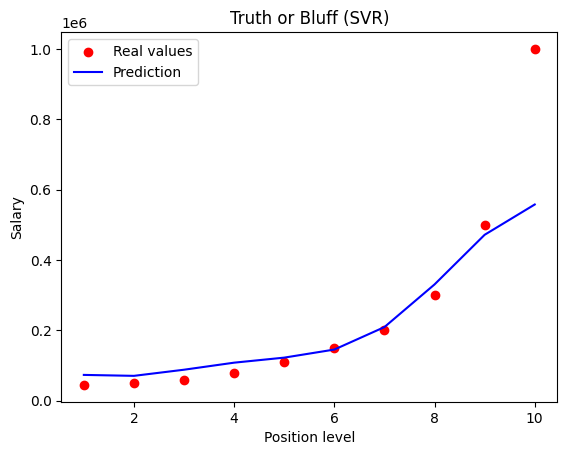

In [24]:
# Plot the original data points by inversely transforming X and y back to their original scales, displaying them as red scatter points
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red', label='Real values')

# Plot the SVR model predictions by inversely transforming the predicted values, displaying the regression line in blue
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue', label='Prediction')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-25-6d78ac67fa01>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


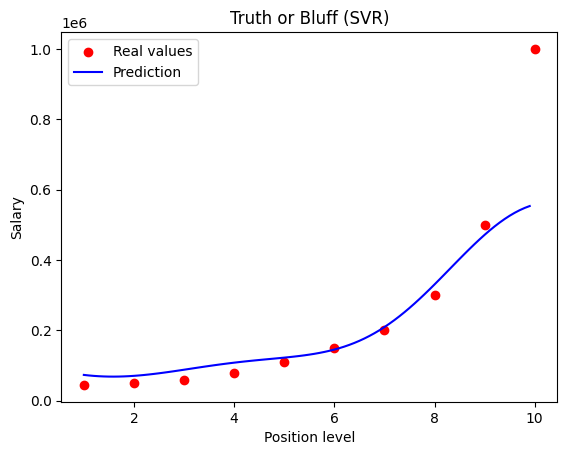

In [25]:
# Create an array of values from the minimum to the maximum of the original feature values, with a step size of 0.1
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)

# Reshape the array to be a column vector (required for prediction)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red', label='Real values')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue', label='Prediction')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()